In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from fcmeans import FCM

In [7]:
#смотрим данные
data = pd.read_csv('databank1.csv', delimiter=';')
data.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target)
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53


In [101]:
import researchpy as rp
data['CreditSum'].describe()

count    1.050500e+04
mean     4.011467e+05
std      3.094524e+05
min      5.000000e+03
25%      1.536998e+05
50%      3.680000e+05
75%      5.500000e+05
max      3.200000e+06
Name: CreditSum, dtype: float64

In [95]:
rp.summary_cont(data['CreditSum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditSum,10505.0,401146.6904,309452.4029,3019.2274,395228.4314,407064.9494


In [4]:
kmeansdataAll = pd.read_csv('kmeansdataAll.csv', delimiter=';')
kmeansdataAll.head()

,Unnamed: 0,Unnamed: 0.1,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome,cluster_pred,cluster_pred_cat
0,0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36,1,Первый
1,1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07,0,Нулевой
2,2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26,2,Второй
3,3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79,0,Нулевой
4,4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53,3,Третий


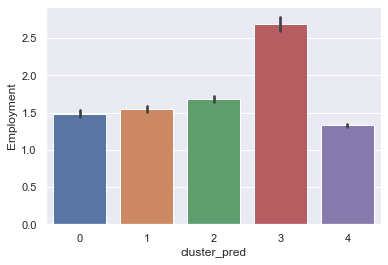

In [143]:
sns.barplot(x="cluster_pred", y="Employment", data=kmeansdataAll);

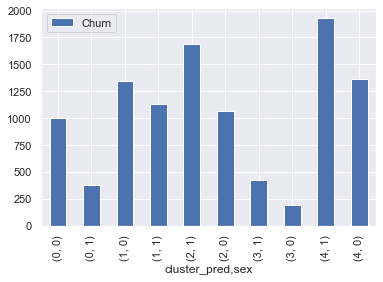

In [5]:
kmeansdataAll['sex'].groupby(kmeansdataAll['cluster_pred']).value_counts().plot(kind='bar', label='Churn')
plt.legend()

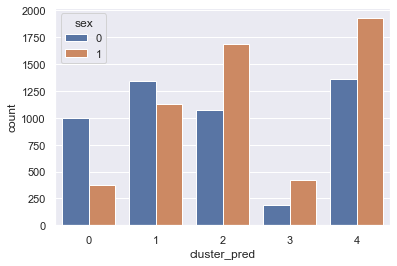

In [6]:
sns.countplot(x='cluster_pred', hue='sex', data=kmeansdataAll);

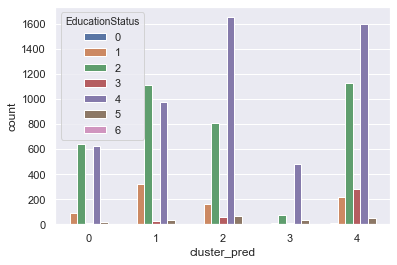

In [15]:
sns.countplot(x='cluster_pred', hue='EducationStatus', data=kmeansdataAll);

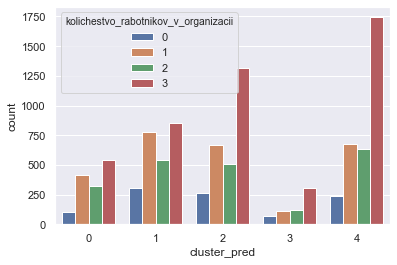

In [16]:
sns.countplot(x='cluster_pred', hue='kolichestvo_rabotnikov_v_organizacii', data=kmeansdataAll);

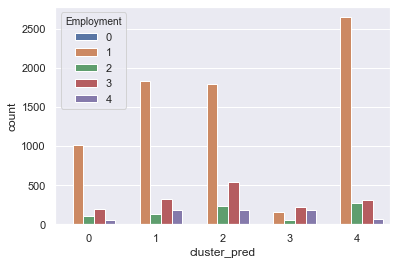

In [17]:
sns.countplot(x='cluster_pred', hue='Employment', data=kmeansdataAll);

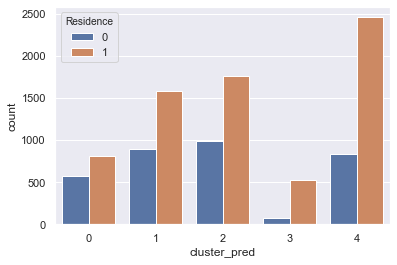

In [30]:
sns.countplot(x='cluster_pred', hue='Residence', data=kmeansdataAll);

In [3]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')
# data.pop('OrgStanding_N')
# data.pop('age')
# data.pop('kolichestvo_detej_mladshe_18')
data.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,1.25,0,30691.36
1,708000.0,44,20.00,0,25712.07
2,665000.0,29,2.00,1,31081.26
3,458000.0,59,23.00,0,17848.79
4,969000.0,51,9.25,2,115380.53


Text(0, 0.5, 'Количество клиентов')

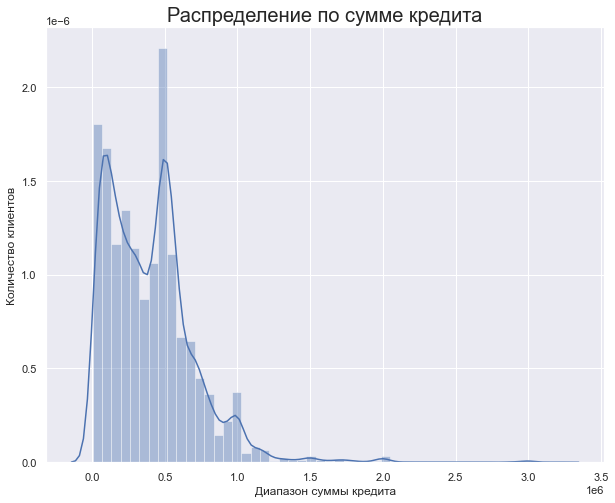

In [45]:
plt.rcParams['figure.figsize'] = (10, 8)
# sns.set(style='darkgrid')
sns.distplot(data['CreditSum'])
plt.title('Распределение по сумме кредита', fontsize=20)
plt.xlabel('Диапазон суммы кредита')
plt.ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

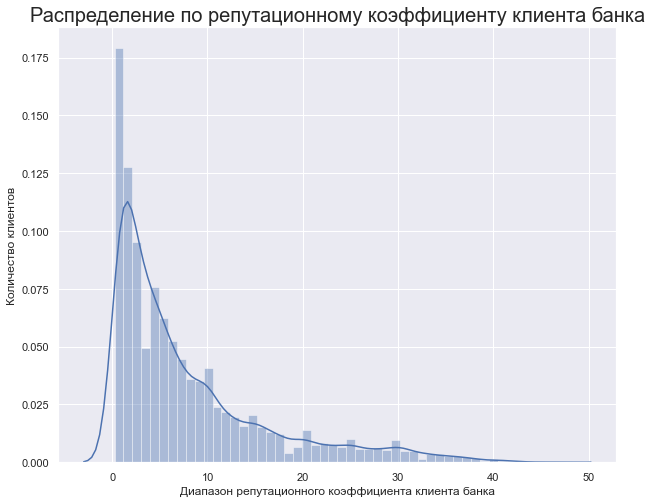

In [48]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.distplot(data['OrgStanding_N'])
plt.title('Распределение по репутационному коэффициенту клиента банка', fontsize=20)
plt.xlabel('Диапазон репутационного коэффициента клиента банка')
plt.ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

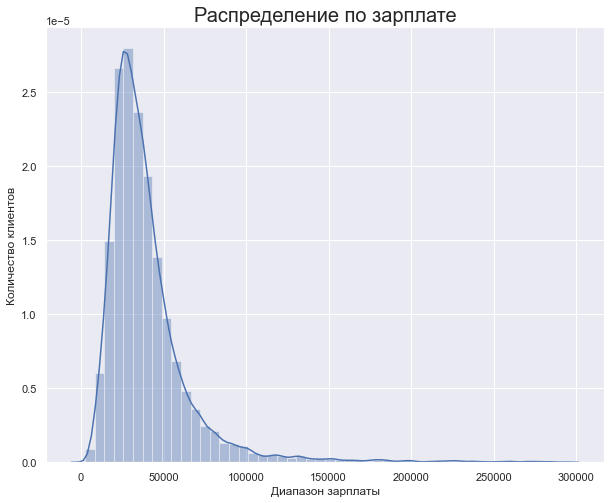

In [44]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.distplot(data['ConfirmedMonthlyIncome (Target)'])
plt.title('Распределение по зарплате', fontsize=20)
plt.xlabel('Диапазон зарплаты')
plt.ylabel('Количество клиентов')

In [140]:
X = data.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.000000e+05, 4.900000e+01, 1.250000e+00, 0.000000e+00,
        3.069136e+04],
       [7.080000e+05, 4.400000e+01, 2.000000e+01, 0.000000e+00,
        2.571207e+04],
       [6.650000e+05, 2.900000e+01, 2.000000e+00, 1.000000e+00,
        3.108126e+04],
       ...,
       [6.000000e+05, 3.400000e+01, 9.000000e+00, 1.000000e+00,
        6.486240e+04],
       [3.762500e+05, 2.600000e+01, 5.000000e-01, 0.000000e+00,
        3.132647e+04],
       [1.050000e+05, 3.300000e+01, 1.000000e+01, 1.000000e+00,
        7.117874e+04]])

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
stscaler = StandardScaler().fit(X)
db11 = stscaler.transform(X)

In [179]:
data = pd.read_csv('databank1.csv', delimiter=';')

In [180]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')
data

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.00,49,1.250000,0,30691.360
1,708000.00,44,20.000000,0,25712.070
2,665000.00,29,2.000000,1,31081.260
3,458000.00,59,23.000000,0,17848.790
4,969000.00,51,9.250000,2,115380.530
5,35000.00,35,5.500000,0,39578.970
6,701000.00,54,1.500000,0,50052.420
7,710000.00,34,9.250000,2,100050.000
8,240000.00,26,3.916666,0,34000.580
9,120400.00,23,3.000000,0,47266.040


In [181]:
fcm = FCM(n_clusters=5)
fcm.fit(data)

In [182]:
clustCentr = fcm.centers
fcm_labels = fcm.predict(data)

In [194]:
clustCentr = clustCentr.values[:,0:]
clustCentr = np.nan_to_num(clustCentr)
clustCentr

array([[9.06221213e+05, 4.06791069e+01, 8.76138321e+00, 7.44628551e-01,
        5.52987951e+04],
       [5.35601612e+05, 4.01644427e+01, 9.03908241e+00, 6.28398191e-01,
        4.20709465e+04],
       [1.84211709e+06, 4.15621862e+01, 8.60200591e+00, 8.31854946e-01,
        9.52085070e+04],
       [9.29280967e+04, 3.76402973e+01, 6.82107016e+00, 5.80386091e-01,
        3.15498217e+04],
       [3.05593281e+05, 3.82390182e+01, 7.39287494e+00, 5.74386713e-01,
        3.53752257e+04]])

In [183]:
fcm_labels

array([1, 1, 1, ..., 1, 4, 3], dtype=int64)

In [184]:
data['cluster_pred']=fcm_labels

In [172]:
l=0
for i in range(0,10505):
    if(data['cluster_pred'][i]==0):
        l=l+1
print(l)

1080


In [185]:
import math
from math import sqrt

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric

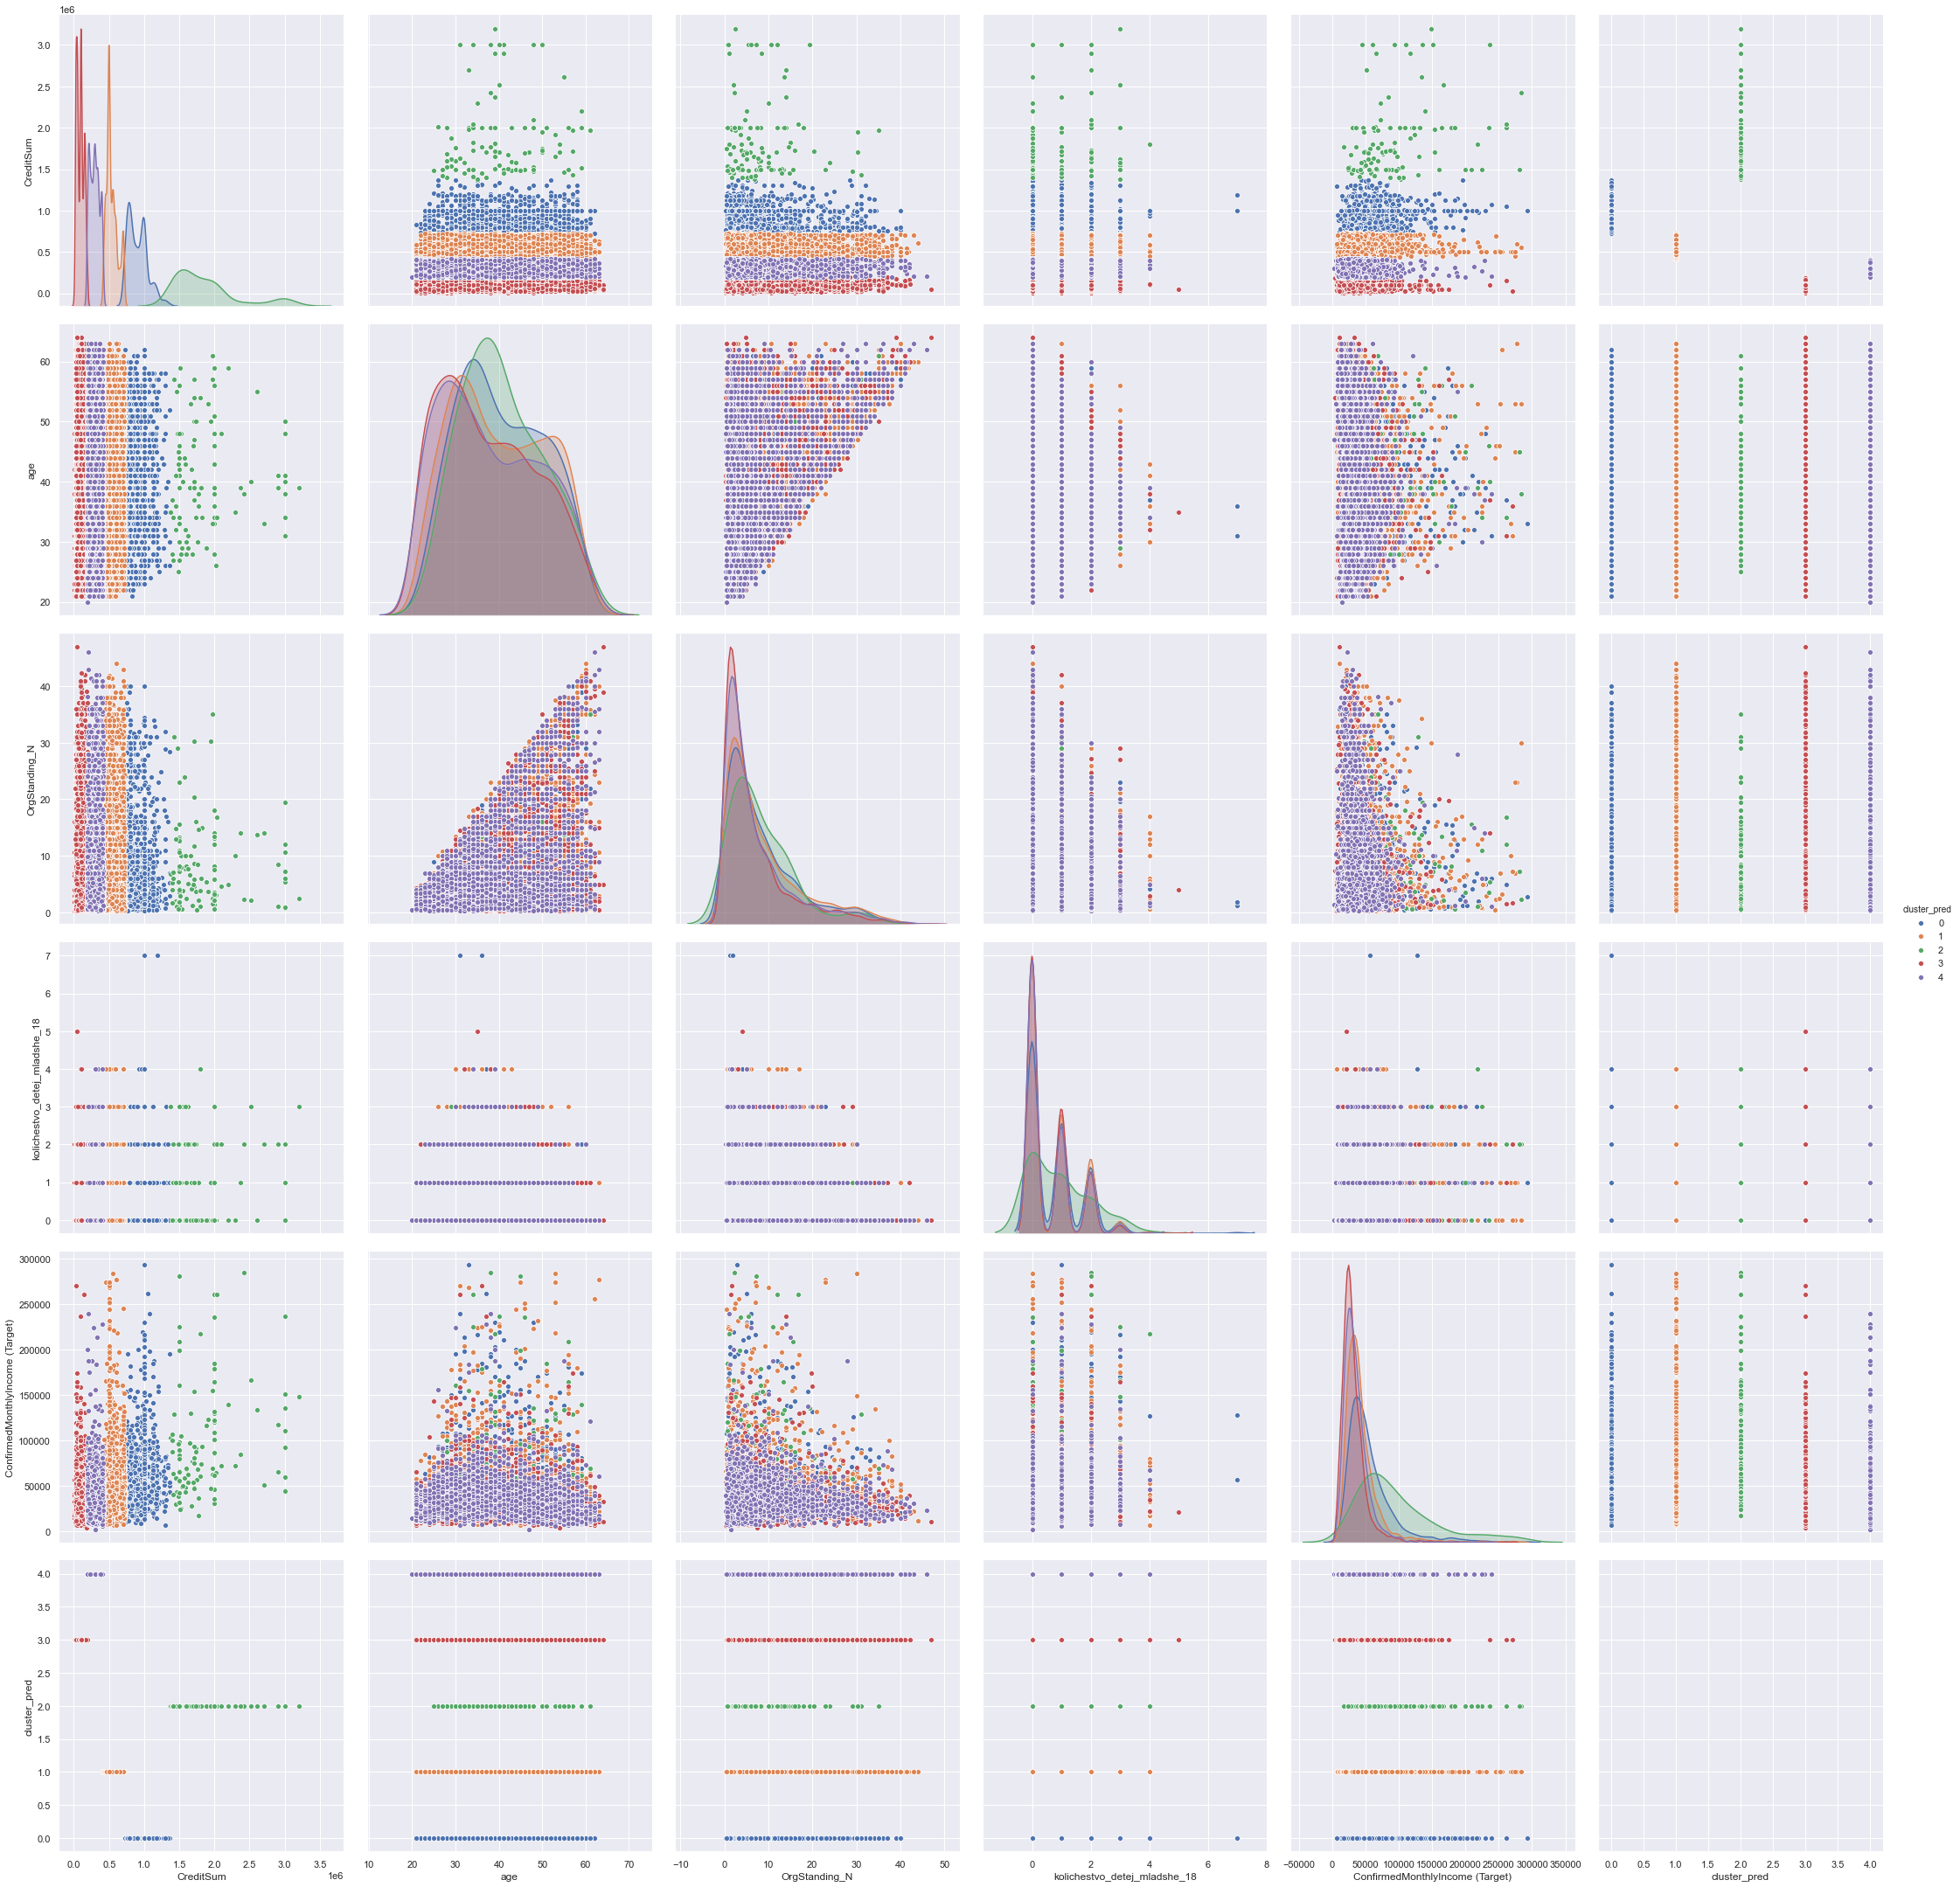

In [186]:
sns.pairplot(data, hue='cluster_pred', size=5, diag_kind='kde')

In [187]:
kolKl=5
kolOb=5

In [189]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = data.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

1080
3597
112
3134
2582


In [195]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolOb):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*clustCentr[l][j]
    obcentrx[j]=obcentrx[j]/10505
    print(obcentrx[j])

399036.03336213104
39.00597217700601
7.939546398632613
0.6149177900584061
39212.87197529457


In [196]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolOb):
        d2[l] = d2[l]+(clustCentr[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])
    print('------')

507440.20663668995
257495563311.48657
------
136595.48284430066
18658325933.467632
------
1444167.0379672372
2085618433551.0632
------
306203.83937558933
93760791248.35173
------
93521.52381992013
8746275417.599888
------


In [197]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/9262
k2=k2/9262
print (k)
print (k2)
SSM=k2

259364.2291424137
96655978645.79842


In [198]:
stscaler = StandardScaler().fit(data)
db11 = stscaler.transform(data)

In [200]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0, 10505):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=data['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-clustCentr[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

1080
907905.1630589043
824291785109.2324
3597
537250.918143684
288638549046.3007
112
1844570.9751698251
3402442082441.255
3134
98138.81659374868
9631227322.493084
2582
307634.324754684
94638877767.32347


In [201]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/10507
k2=k2/10507
print (k)
print (k2)
SSV=k2

401779.7616452718
245939216797.83554


In [202]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, 10505):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/9262
s4=s4/9262
print(s2)
print(s4)
SS=s4

454768.4038941859
182343080204.30298


In [203]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.5300775797880676

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

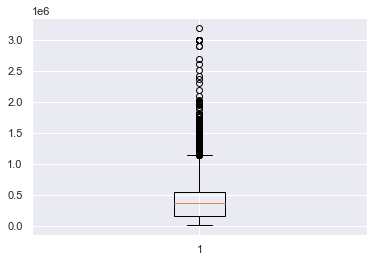

In [52]:
plt.boxplot(data['CreditSum'])
plt.show()

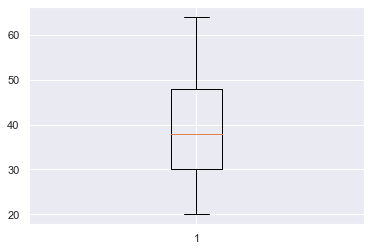

In [53]:
plt.boxplot(data['age'])
plt.show()

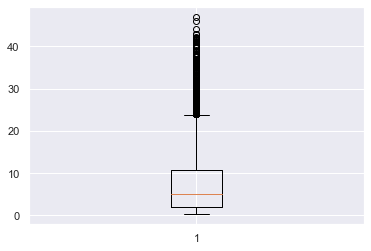

In [54]:
plt.boxplot(data['OrgStanding_N'])
plt.show()

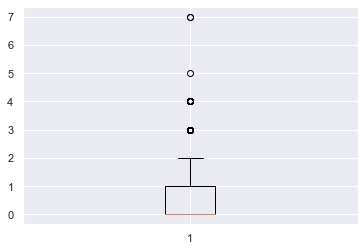

In [55]:
plt.boxplot(data['kolichestvo_detej_mladshe_18'])
plt.show()

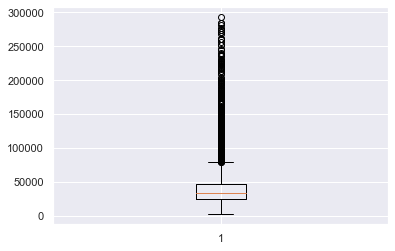

In [56]:
plt.boxplot(data['ConfirmedMonthlyIncome (Target)'])
plt.show()

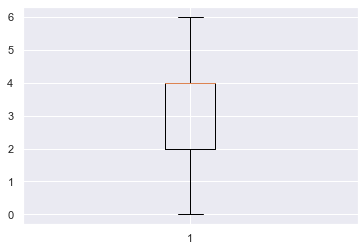

In [58]:
plt.boxplot(data['EducationStatus'])
plt.show()

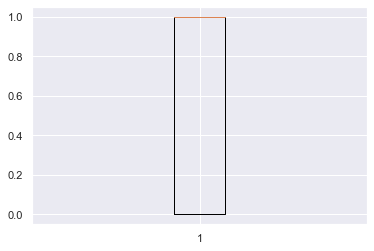

In [59]:
plt.boxplot(data['sex'])
plt.show()

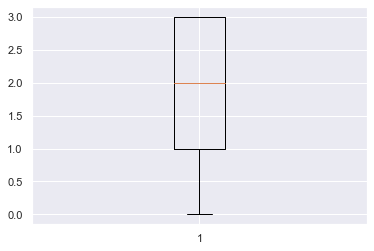

In [60]:
plt.boxplot(data['kolichestvo_rabotnikov_v_organizacii'])
plt.show()

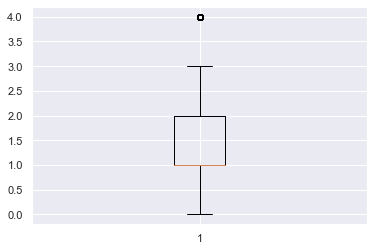

In [61]:
plt.boxplot(data['Employment'])
plt.show()

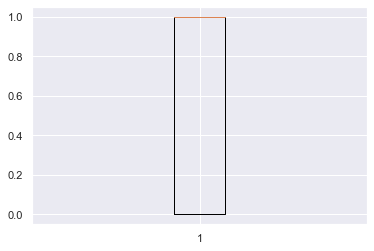

In [62]:
plt.boxplot(data['Residence'])
plt.show()

Text(0.5, 0.98, '')

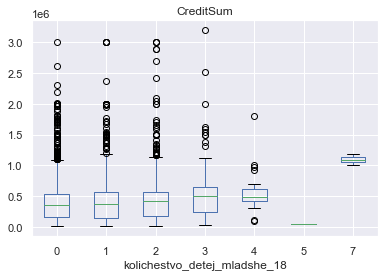

In [54]:
ax = data.boxplot(column='CreditSum', by = 'kolichestvo_detej_mladshe_18')
ax.get_figure().suptitle('')

In [55]:
print(data['kolichestvo_detej_mladshe_18'].value_counts())

0    6056
1    2677
2    1521
3     228
4      20
7       2
5       1
Name: kolichestvo_detej_mladshe_18, dtype: int64


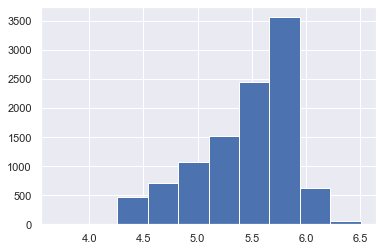

In [56]:
x = np.log10(data['CreditSum'])
pd.Series(x).hist()

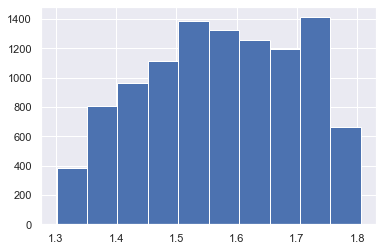

In [57]:
x = np.log10(data['age'])
pd.Series(x).hist()

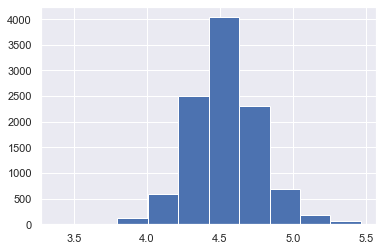

In [59]:
x = np.log10(data['ConfirmedMonthlyIncome (Target)'])
pd.Series(x).hist()

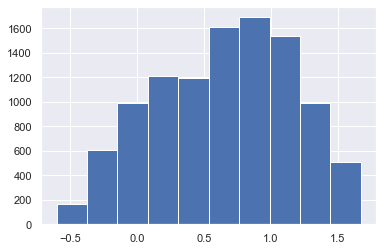

In [60]:
x = np.log10(data['OrgStanding_N'])
pd.Series(x).hist()

In [61]:
data.describe()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
count,1.050500e+04,10505.000000,10505.000000,10505.000000,10505.000000
mean,4.011467e+05,39.017230,7.921966,0.618943,40104.632200
std,3.094524e+05,10.926535,8.327044,0.829738,27140.116938
min,5.000000e+03,20.000000,0.250000,0.000000,2393.120000
25%,1.536998e+05,30.000000,2.000000,0.000000,24637.320000
50%,3.680000e+05,38.000000,5.000000,0.000000,33776.980000
75%,5.500000e+05,48.000000,10.750000,1.000000,46820.500000
max,3.200000e+06,64.000000,47.000000,7.000000,293376.370000


In [64]:
j=0
m=0
for i in range(0,10505):
    if(data['sex'][i]==0):
        j=j+1
    if(data['sex'][i]==1):
        m=m+1
print("Мужчин: ",m)
print("Женщин: ",j)

Мужчин:  5540
Женщин:  4965


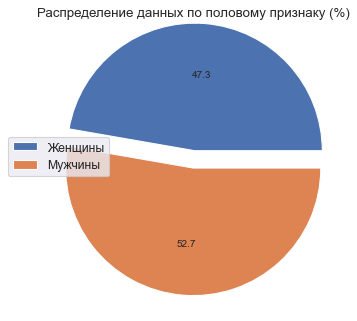

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt

data_names = ['Женщины', 'Мужчины']
data_values = [j, m]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по половому признаку (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [16]:
s=0
g=0
for i in range(0,10505):
    if(data['Residence'][i]==0):
        s=s+1
    if(data['Residence'][i]==1):
        g=g+1
print("Село: ",s)
print("Город: ",g)

Село:  3365
Город:  7140


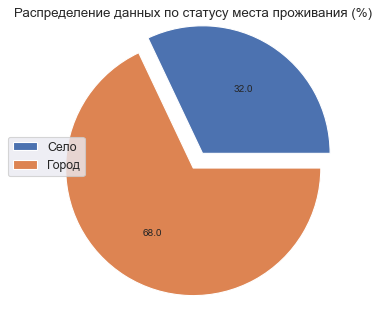

In [17]:
data_names = ['Село', 'Город']
data_values = [s, g]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по статусу места проживания (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [20]:
# kolichestvo_rabotnikov_v_organizacii
s=[0,0,0,0]
for j in range(0,4):
    for i in range(0,10505):
        if(data['kolichestvo_rabotnikov_v_organizacii'][i]==j):
            s[j]=s[j]+1
s

[977, 2644, 2124, 4760]

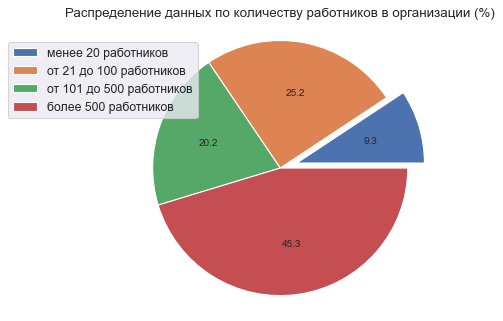

In [28]:
data_names = ['менее 20 работников', 'от 21 до 100 работников', 'от 101 до 500 работников','более 500 работников']
data_values = [s[0], s[1], s[2], s[3]]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по количеству работников в организации (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.46, 0.65, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [66]:
# Employment
s=[0,0,0,0,0]
for j in range(0,5):
    for i in range(0,10505):
        if(data['Employment'][i]==j):
            s[j]=s[j]+1
s

[3, 7443, 805, 1579, 675]

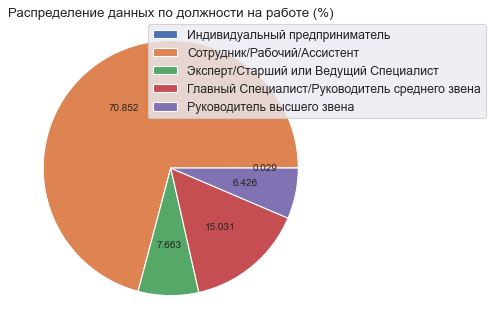

In [72]:
data_names = ['Индивидуальный предприниматель', 'Сотрудник/Рабочий/Ассистент', 
              'Эксперт/Старший или Ведущий Специалист','Главный Специалист/Руководитель среднего звена',
              'Руководитель высшего звена']
data_values = [s[0], s[1], s[2], s[3], s[4]]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по должности на работе (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.3f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (0.4, 0.65, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [73]:
s=[0,0,0,0,0,0,0]
for j in range(0,7):
    for i in range(0,10505):
        if(data['EducationStatus'][i]==j):
            s[j]=s[j]+1
s

[23, 803, 3755, 385, 5338, 189, 12]

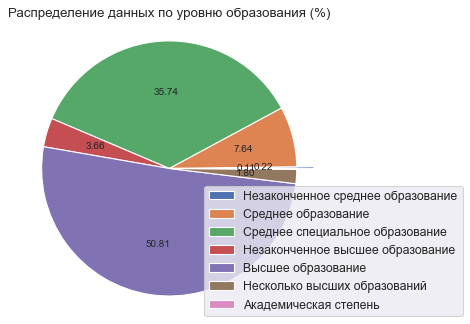

In [85]:
data_names = ['Незаконченное среднее образование', 'Среднее образование', 
              'Среднее специальное образование','Незаконченное высшее образование',
              'Высшее образование', 'Несколько высших образований', 'Академическая степень']
data_values = [s[0], s[1], s[2], s[3], s[4], s[5], s[6]]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по уровню образования (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.2f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (0.6, -0.03, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [39]:
s=[0,0,0,0,0,0,0,0]
for j in range(0,10):
    for i in range(0,10505):
        if(data['kolichestvo_detej_mladshe_18'][i]==j):
            s[j]=s[j]+1
s

[6056, 2677, 1521, 228, 20, 1, 0, 2]

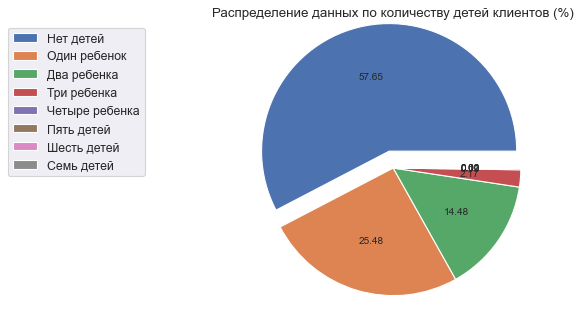

In [40]:
data_names = ['Нет детей', 'Один ребенок', 
              'Два ребенка','Три ребенка',
              'Четыре ребенка', 'Пять детей', 'Шесть детей', 'Семь детей']
data_values = [s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7]]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение данных по количеству детей клиентов (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.2f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.85, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

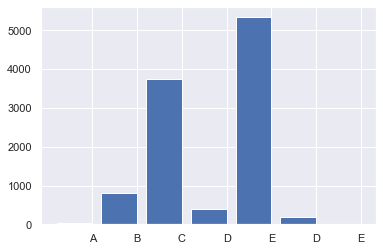

In [56]:
index = np.arange(7)
values1 = [s[0], s[1], s[2], s[3], s[4], s[5], s[6]]
plt.bar(index, values1)
plt.xticks(index+0.4,['A','B','C','D','E','D','E'])
plt.show()

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ age', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age,1.079194e+13,1.0,113.908253,1.864518e-26
Residual,9.950794e+14,10503.0,NaN,NaN


In [ ]:
, OrgStanding_N, kolichestvo_detej_mladshe_18, ConfirmedMonthlyIncome (Target)

In [4]:
data.corr()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
CreditSum,1.000000,0.103581,0.091902,0.074613,0.355351
age,0.103581,1.000000,0.485723,-0.166742,-0.020634
OrgStanding_N,0.091902,0.485723,1.000000,-0.061129,-0.005681
kolichestvo_detej_mladshe_18,0.074613,-0.166742,-0.061129,1.000000,0.208066
ConfirmedMonthlyIncome (Target),0.355351,-0.020634,-0.005681,0.208066,1.000000
